### How are in-dmand skills trending for Data Analysts?

#### Methodology
>  ##### Aggregate skill counnts monthly
>  ##### Re-analyze based on percentage of total jobs
>  ##### Plot the monthly skill demand


In [1]:
# Importing Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data CleanUp
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter the dataframe for Data Analysts in the United States

df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [3]:
# Create a column for job posted month number, job_posted_month_no

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode the skills column of the dataframe and save in a new dataframe

df_DA_US_explode = df_DA_US.explode('job_skills')

In [4]:
# Pivot the exploded dataframe and save in new dataframe,df_DA_US_pivot

df_DA_US_pivot = df_DA_US_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size',
                                                fill_value = 0)
                        
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [5]:
# Create a new row to  hold the Total value of each column

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [6]:
df_DA_US_pivot.loc['Total'].sort_values(ascending = False)

job_skills
sql           34452
excel         27519
tableau       19311
python        18382
sas           13200
              ...  
couchdb           1
capacitor         1
codecommit        1
chainer           1
msaccess          1
Name: Total, Length: 218, dtype: int64

In [7]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending = False).index]

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [9]:
DA_month_total = df_DA_US.groupby('job_posted_month_no').size()

DA_month_total

job_posted_month_no
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [10]:
df_DA_US_percent = df_DA_US_pivot.div(DA_month_total / 100, axis = 0)

df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
6,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
7,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df_DA_US_percent = df_DA_US_percent.reset_index()

df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x : pd.to_datetime(x, format = "%m").
                                                                                        strftime('%b'))

df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')

df_DA_US_percent = df_DA_US_percent.drop(columns = ['job_posted_month_no'])

df_DA_US_percent

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


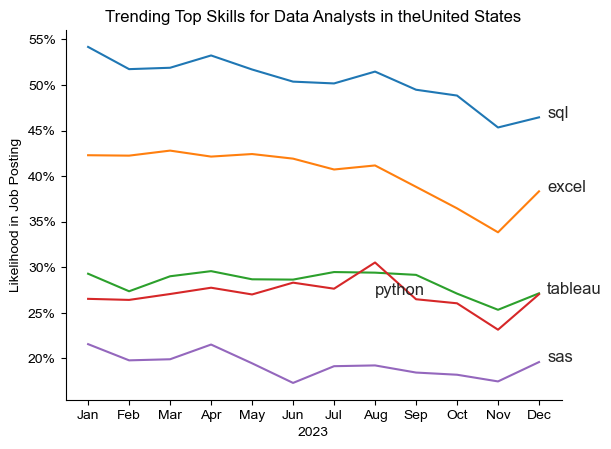

In [12]:
df_plot = df_DA_US_percent.iloc[: , :5]

sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in theUnited States')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    if (i == 2 | i == 3):
        plt.text(11-i-1, df_plot.iloc[-1,i], df_plot.columns[i])
        continue
    else:
        plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])